In [1]:
# CIS 9650 Term Project
# Group 13
# Shopping Mall Data Analysis
# Team Member: Yifan Zang, Reny Marinez, Tapan Uchil, Shubh Goyal, Harshdeep Singh

In [2]:
## Part 1: Import data using Kaggle API for data extraction and loading

In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd

# Initialize and authenticate the Kaggle API 
api = KaggleApi()
api.authenticate()

# Define the dataset identifier and the specific file name based on website info
dataset_identifier = "zubairmustafa/shopping-mall-customer-segmentation-data"
filename = "Shopping Mall Customer Segmentation Data .csv" 

# Download the specific file directly
api.dataset_download_file(dataset_identifier, filename, path='./')

# Load the downloaded file into a Pandas DataFrame
data = pd.read_csv(f'./{filename}')

# Display the first few rows of the DataFrame
print(data.head())


OSError: Could not find kaggle.json. Make sure it's located in C:\Users\harsh\.kaggle. Or use the environment method.

In [4]:
## By utilizing kaggle API,our group successfully get in the dataset and the data structure looks clear and organized

In [5]:
## PART II: Clean Up the Dataset
## Get a summary of dataset and check if column name is meaningful or correct
print("Basic Information:")
data.info()

Basic Information:


NameError: name 'data' is not defined

In [246]:
## Feedback:The column names are all meaningful and clean
## Feedback:There are 15079 transaction records with 5 features (columns)
## Feedback: The features are Customer ID, Age, Gender, Annual Income, Spending Score
## Check Null Record and Remove Null Record in the dataframe
null_counts = data.isnull().sum()
print(null_counts)

Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64


In [247]:
## The output above shows that this dataset is relatively clean with no missing values

In [248]:
## Continue on data cleaning by removing unnecessary columns
## We would like to remove the Customer ID as each specific ID is not relevent to answer our research question
import pandas as pd

total_records = data['Customer ID'].count()
print(f"Total records for 'Customer ID': {total_records}")

# Remove 'Customer ID' column in-place
data.drop('Customer ID', axis=1, inplace=True)

# Display the first few rows to confirm removal
print(data.head())


Total records for 'Customer ID': 15079
   Age  Gender  Annual Income  Spending Score
0   30    Male         151479              89
1   58  Female         185088              95
2   62  Female          70912              76
3   23    Male          55460              57
4   24    Male         153752              76


In [249]:
## Feedback:15079 Customer ID were removed successfully for cleaning purpose

In [250]:
## PART III Statistical Analysis
### Basic Statistics for EDA(Range, Median,Percentage,Percentile) and related Visualizations
### Display range and percentiles for specified columns
import pandas as pd
# List of columns to analyze
columns_to_analyze = ['Age', 'Spending Score', 'Annual Income']

# Function to calculate the median, average, range, and percentiles
def analyze_column(df, column):
    # Calculate median and mean
    median_val = df[column].median()
    mean_val = df[column].mean()
    
    # Calculate range
    min_val = df[column].min()
    max_val = df[column].max()
    col_range = max_val - min_val
    
    # Calculate percentiles
    percentiles = df[column].quantile([0.25, 0.5, 0.75, 0.9, 0.99])

    # Print results
    print(f"Analysis of '{column}':")
    print(f"  Median: {median_val}")
    print(f"  Average (Mean): {mean_val}")
    print(f"  Range: {col_range} (Min: {min_val}, Max: {max_val})")
    print("  Percentiles:")
    print(percentiles)
    print("\n")

# Write a for loop to Perform Basic Stats analysis on each column
for column in columns_to_analyze:
    analyze_column(data, column)


Analysis of 'Age':
  Median: 54.0
  Average (Mean): 54.191590954307316
  Range: 72 (Min: 18, Max: 90)
  Percentiles:
0.25    36.0
0.50    54.0
0.75    72.0
0.90    83.0
0.99    90.0
Name: Age, dtype: float64


Analysis of 'Spending Score':
  Median: 51.0
  Average (Mean): 50.59161748126534
  Range: 99 (Min: 1, Max: 100)
  Percentiles:
0.25     26.0
0.50     51.0
0.75     75.0
0.90     91.0
0.99    100.0
Name: Spending Score, dtype: float64


Analysis of 'Annual Income':
  Median: 109190.0
  Average (Mean): 109742.88056237152
  Range: 179952 (Min: 20022, Max: 199974)
  Percentiles:
0.25     64141.0
0.50    109190.0
0.75    155008.0
0.90    181941.6
0.99    198031.1
Name: Annual Income, dtype: float64




In [251]:
### Generate both the mean and count for Spending Score based on its spending level
# Define the income bins and their labels
income_bins = [0, 30000, 60000, 100000, 150000, float('inf')]
income_labels = ['Low', 'Lower-Middle', 'Upper-Middle', 'High', 'Very High']

# Categorize 'Annual Income' into bins
data['Income Group'] = pd.cut(data['Annual Income'], bins=income_bins, labels=income_labels)

# Function to analyze 'Spending Score' by income group
def analyze_spending_score_by_income_group(df, group_col, target_col):
    grouped = df.groupby(group_col)

    for group_name, group_data in grouped:
        print(f"Analysis of '{target_col}' for {group_col}: {group_name}")

        # Calculate median and mean
        median_val = group_data[target_col].median()
        mean_val = group_data[target_col].mean()

        # Calculate range
        min_val = group_data[target_col].min()
        max_val = group_data[target_col].max()
        col_range = max_val - min_val

        # Calculate percentiles
        percentiles = group_data[target_col].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

        # Print results
        print(f"  Median: {median_val}")
        print(f"  Average (Mean): {mean_val}")
        print(f"  Range: {col_range} (Min: {min_val}, Max: {max_val})")
        print("  Percentiles:")
        print(percentiles)
        print("\n")

# Analyze 'Spending Score' by income group
analyze_spending_score_by_income_group(data, 'Income Group', 'Spending Score')
    
#### get the percentage of customer's gender

### Count occurrences of each gender
gender_counts = data['Gender'].value_counts()

### Calculate total number of customers
total_customers = gender_counts.sum()

### Calculate percentage for each gender
gender_percentages = (gender_counts / total_customers) * 100

### Display percentages
print(gender_percentages)

Analysis of 'Spending Score' for Income Group: Low
  Median: 52.0
  Average (Mean): 51.56175771971496
  Range: 99 (Min: 1, Max: 100)
  Percentiles:
0.25     27.0
0.50     52.0
0.75     76.0
0.90     90.0
0.95     94.0
0.99    100.0
Name: Spending Score, dtype: float64


Analysis of 'Spending Score' for Income Group: Lower-Middle
  Median: 49.0
  Average (Mean): 49.77158135981665
  Range: 99 (Min: 1, Max: 100)
  Percentiles:
0.25    26.00
0.50    49.00
0.75    75.00
0.90    91.00
0.95    96.00
0.99    99.83
Name: Spending Score, dtype: float64


Analysis of 'Spending Score' for Income Group: Upper-Middle
  Median: 51.0
  Average (Mean): 50.75233222991273
  Range: 99 (Min: 1, Max: 100)
  Percentiles:
0.25     26.0
0.50     51.0
0.75     76.0
0.90     91.0
0.95     95.0
0.99    100.0
Name: Spending Score, dtype: float64


Analysis of 'Spending Score' for Income Group: High
  Median: 51.0
  Average (Mean): 50.806498900561934
  Range: 99 (Min: 1, Max: 100)
  Percentiles:
0.25    26.0
0.50  

/var/folders/4q/fyp8q_t545vf1gx757v54twc0000gn/T/ipykernel_16188/2969383047.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(group_col)


In [252]:
## Create a new data frame to store the key statistc calculated based on prior codes
import pandas as pd

# Data for each income group analysis
data = {
    "Income Group": ["Low", "Lower-Middle", "Upper-Middle", "High", "Very High"],
    "Median": [52.0, 49.0, 51.0, 51.0, 51.0],
    "Average (Mean)": [51.56175771971496, 49.77158135981665, 50.75233222991273, 50.806498900561934, 50.57173447537473],
    "Range": [99, 99, 99, 99, 99],
    "Min": [1, 1, 1, 1, 1],
    "Max": [100, 100, 100, 100, 100],
    "25th Percentile": [27.0, 26.0, 26.0, 26.0, 26.0],
    "50th Percentile (Median)": [52.0, 49.0, 51.0, 51.0, 51.0],
    "75th Percentile": [76.0, 75.0, 76.0, 75.0, 75.0],
    "90th Percentile": [90.0, 91.0, 91.0, 90.0, 91.0],
    "95th Percentile": [94.0, 96.0, 95.0, 95.0, 95.0],
    "99th Percentile": [100.0, 99.83, 100.0, 99.0, 100.0]
}

# Create a DataFrame
analysis_df = pd.DataFrame(data)

# Display the DataFrame
print("Analysis of Spending Score by Income Group")
print(analysis_df)


Analysis of Spending Score by Income Group
   Income Group  Median  Average (Mean)  Range  Min  Max  25th Percentile  \
0           Low    52.0       51.561758     99    1  100             27.0   
1  Lower-Middle    49.0       49.771581     99    1  100             26.0   
2  Upper-Middle    51.0       50.752332     99    1  100             26.0   
3          High    51.0       50.806499     99    1  100             26.0   
4     Very High    51.0       50.571734     99    1  100             26.0   

   50th Percentile (Median)  75th Percentile  90th Percentile  \
0                      52.0             76.0             90.0   
1                      49.0             75.0             91.0   
2                      51.0             76.0             91.0   
3                      51.0             75.0             90.0   
4                      51.0             75.0             91.0   

   95th Percentile  99th Percentile  
0             94.0           100.00  
1             96.0         

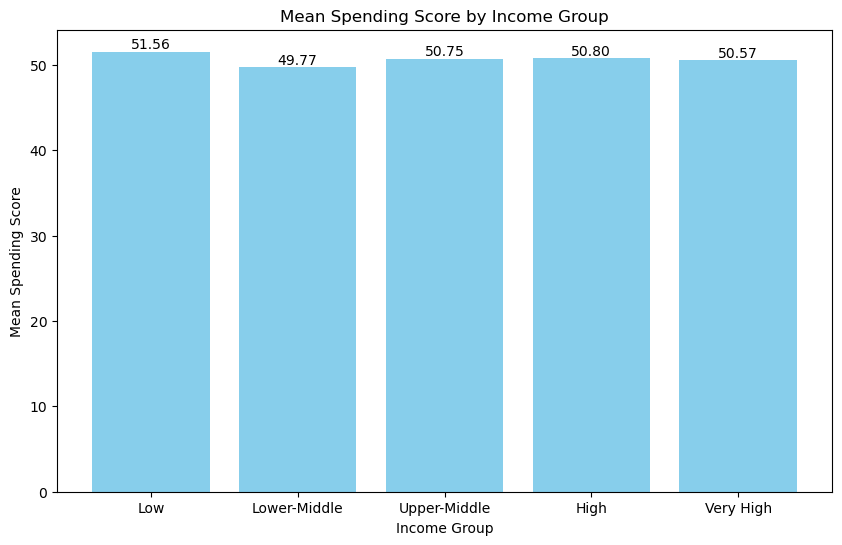

In [253]:
## Visualize the income groups and their respective mean values
import matplotlib.pyplot as plt

# Define the income groups and their respective mean values
income_labels = ['Low', 'Lower-Middle', 'Upper-Middle', 'High', 'Very High']
mean_values = [51.56, 49.77, 50.75, 50.80, 50.57]

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(income_labels, mean_values, color='skyblue')

# Add annotations to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.xlabel('Income Group')
plt.ylabel('Mean Spending Score')
plt.title('Mean Spending Score by Income Group')
plt.show()


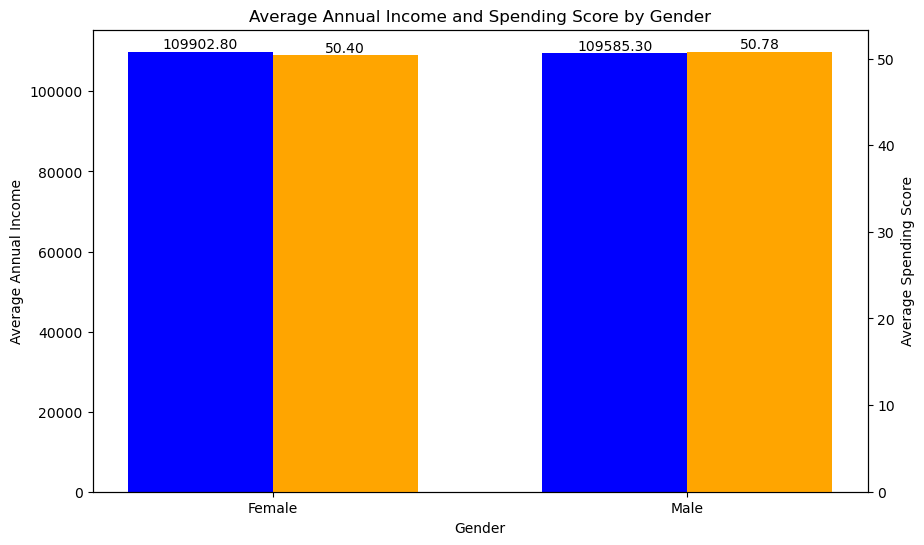

In [254]:
## Visualize Spending Score based on Mean Annual Income by Gender
import matplotlib.pyplot as plt
import numpy as np

# Define gender categories and their respective average annual income and spending scores
genders = ['Female', 'Male']
average_income = [109902.799572, 109585.298749]
average_spending_score = [50.397648316408336, 50.78275181040158]

# Set up the bar width and positions
bar_width = 0.35
index = np.arange(len(genders))

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first set of bars (average annual income)
bar1 = ax1.bar(index - bar_width/2, average_income, bar_width, label='Average Annual Income', color='blue')

# Create a secondary y-axis to plot the spending score
ax2 = ax1.twinx()
bar2 = ax2.bar(index + bar_width/2, average_spending_score, bar_width, label='Average Spending Score', color='orange')

# Add labels and titles
ax1.set_xlabel('Gender')
ax1.set_ylabel('Average Annual Income')
ax2.set_ylabel('Average Spending Score')
ax1.set_title('Average Annual Income and Spending Score by Gender')
ax1.set_xticks(index)
ax1.set_xticklabels(genders)

# Add data labels for annual income
for bar in bar1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Add data labels for spending score
for bar in bar2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()


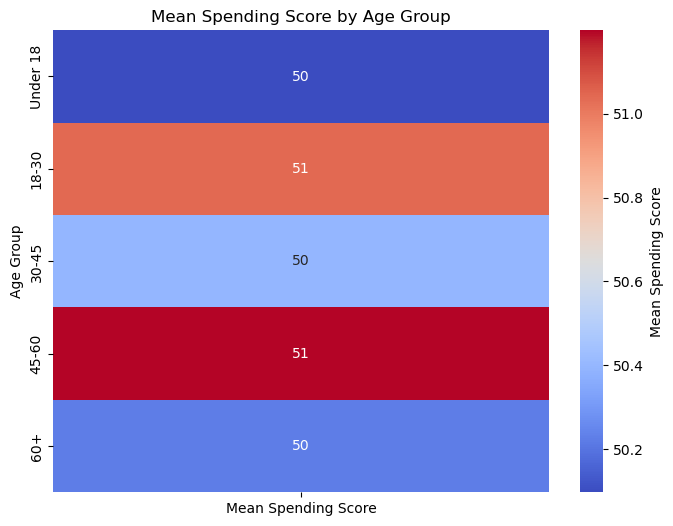

In [255]:
## Visualize Mean Spending Score by Age Group in HeatMap
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data for the mean spending scores
age_group_means = {
    "Age Group": ["Under 18", "18-30", "30-45", "45-60", "60+"],
    "Mean Spending Score": [50.097938144329895, 51.04276985743381, 50.39475388601036, 51.19832312157369, 50.22544464028201]
}

# Create a DataFrame
age_group_df = pd.DataFrame(age_group_means)

# Set the index to the Age Group for easier plotting
age_group_df.set_index("Age Group", inplace=True)

# Create a heat map for the mean spending score by age group
plt.figure(figsize=(8, 6))
sns.heatmap(age_group_df, annot=True, cmap="coolwarm", cbar_kws={'label': 'Mean Spending Score'})

plt.title("Mean Spending Score by Age Group")
plt.show()


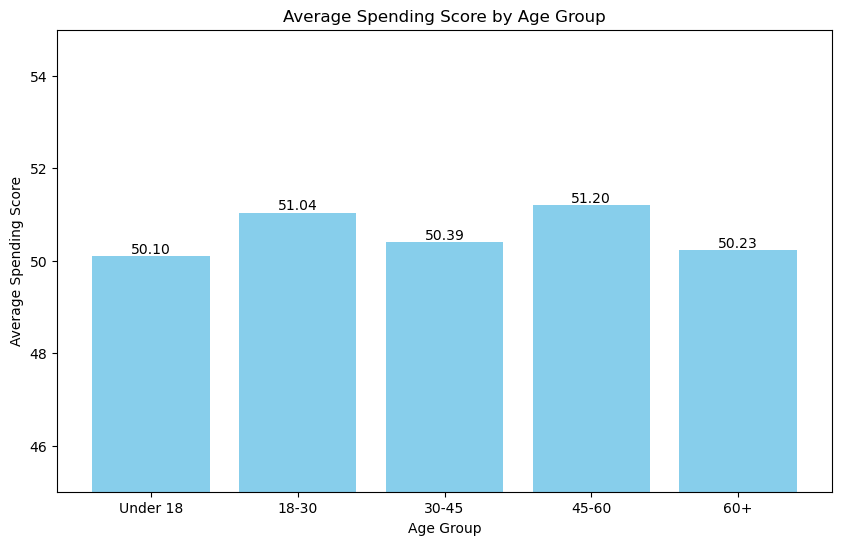

In [256]:
# Visualize mean spending scores for each age group
import matplotlib.pyplot as plt

# Data: mean spending scores for each age group
age_groups = ['Under 18', '18-30', '30-45', '45-60', '60+']
mean_spending_scores = [50.097938144329895, 51.04276985743381, 50.39475388601036, 51.19832312157369, 50.22544464028201]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(age_groups, mean_spending_scores, color='skyblue')

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Set chart title and labels
plt.title('Average Spending Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending Score')
plt.ylim(45, 55)  # Adjust y-axis limits to provide better clarity

# Display the chart
plt.show()


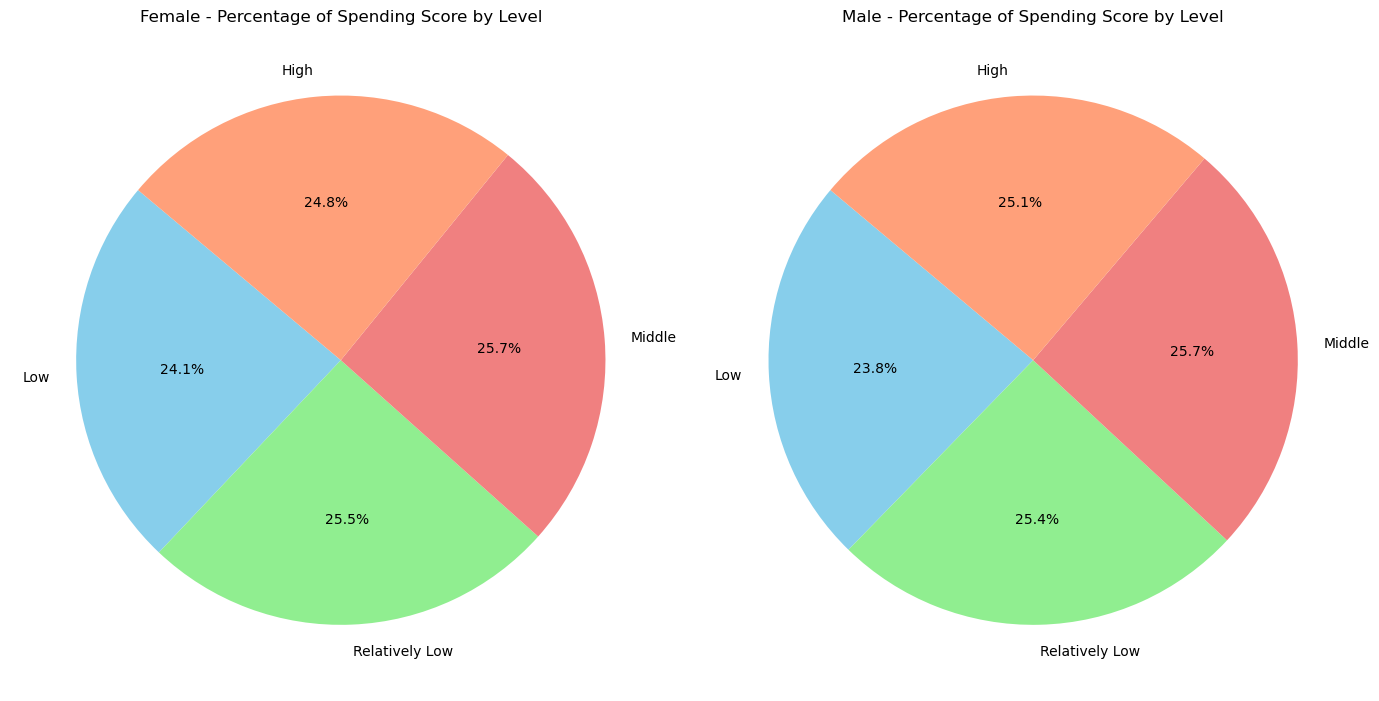

In [257]:
## Visualize Spending Score" based on the level of spending score under each gender category
import matplotlib.pyplot as plt

# Prior EDA Data output for each gender group
labels = ['Low', 'Relatively Low', 'Middle', 'High']
female_data = [24.051317, 25.455773, 25.725861, 24.767049]
male_data = [23.818400, 25.376115, 25.708960, 25.096525]

# Set up the figure for two pie charts
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Plot Female pie chart
axs[0].pie(female_data, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
axs[0].set_title("Female - Percentage of Spending Score by Level")

# Plot Male pie chart
axs[1].pie(male_data, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
axs[1].set_title("Male - Percentage of Spending Score by Level")

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()


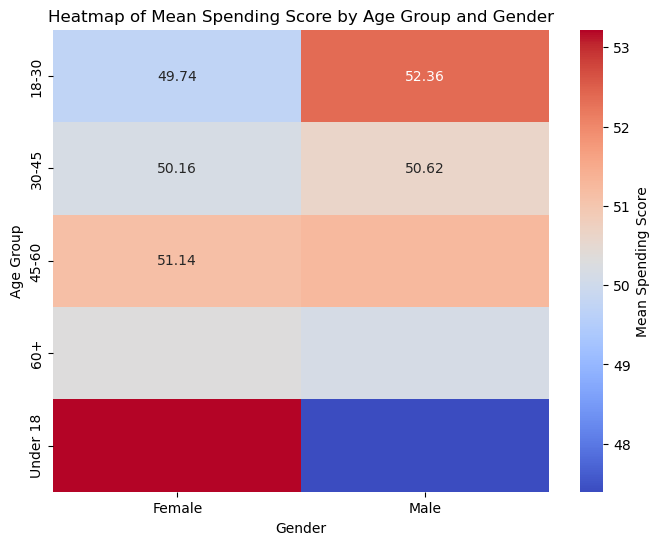

In [258]:
# Visualize Spending Score by Age and Gender
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Mean Spending Score Data for each age group and gender based on Prior EDA output
data = {
    'Age Group': ['Under 18', 'Under 18', '18-30', '18-30', '30-45', '30-45', '45-60', '45-60', '60+', '60+'],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Mean Spending Score': [
        53.22222222222222, 47.39423076923077,
        49.73538961038961, 52.35977105478332,
        50.16158940397351, 50.61787072243346,
        51.138392857142854, 51.25962165688193,
        50.31874189364462, 50.134304719670574
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Pivot the data for heatmap format
pivot_table = df.pivot(index="Age Group", columns="Gender", values="Mean Spending Score")

# Create a heatmap with annotations formatted to two decimal places
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Mean Spending Score'})
plt.title("Heatmap of Mean Spending Score by Age Group and Gender")
plt.ylabel("Age Group")
plt.xlabel("Gender")
plt.show()


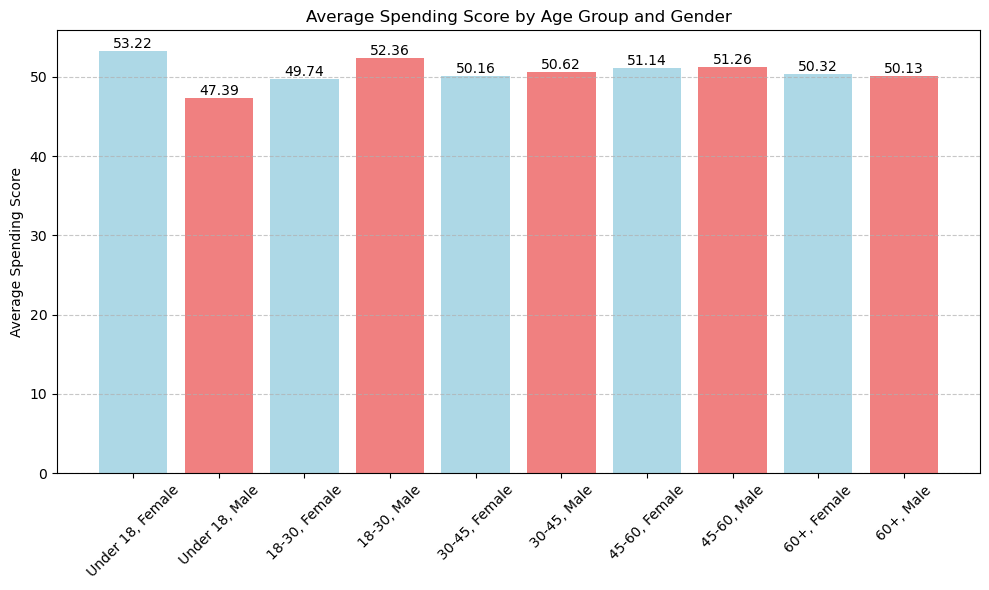

In [259]:
## Use dual-bar chart to visualize average spending score by age and gender
import matplotlib.pyplot as plt
import numpy as np

# Data output
age_gender_groups = [
    "Under 18, Female", "Under 18, Male",
    "18-30, Female", "18-30, Male",
    "30-45, Female", "30-45, Male",
    "45-60, Female", "45-60, Male",
    "60+, Female", "60+, Male"
]

mean_values = [
    53.22, 47.39,
    49.74, 52.36,
    50.16, 50.62,
    51.14, 51.26,
    50.32, 50.13
]

# Arrange data into a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Index for bar positions
indices = np.arange(len(mean_values))

# Plot bars for each age and gender group
bars = ax.bar(indices, mean_values, color=['lightblue', 'lightcoral'] * 5)

# Add labels to each bar
for bar in bars:
    y_val = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, y_val, 
        round(y_val, 2), 
        ha='center', va='bottom'
    )

# Customize the plot
ax.set_xticks(indices)
ax.set_xticklabels(age_gender_groups, rotation=45)
ax.set_ylabel('Average Spending Score')
ax.set_title('Average Spending Score by Age Group and Gender')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [260]:
## PART III: Statistical Analysis using Simple Linear Regression
## Age and Spending score
## Install stats package
## Recall dataset to make the data file works
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd

# Initialize and authenticate the Kaggle API 
api = KaggleApi()
api.authenticate()

# Define the dataset identifier and the specific file name based on website info
dataset_identifier = "zubairmustafa/shopping-mall-customer-segmentation-data"
filename = "Shopping Mall Customer Segmentation Data .csv" 

# Download the specific file directly
api.dataset_download_file(dataset_identifier, filename, path='./')

# Load the downloaded file into a Pandas DataFrame
data = pd.read_csv(f'./{filename}')

# Remove 'Customer ID' column in-place
data.drop('Customer ID', axis=1, inplace=True)

# Display the first few rows to confirm removal
print(data.head())

Dataset URL: https://www.kaggle.com/datasets/zubairmustafa/shopping-mall-customer-segmentation-data
   Age  Gender  Annual Income  Spending Score
0   30    Male         151479              89
1   58  Female         185088              95
2   62  Female          70912              76
3   23    Male          55460              57
4   24    Male         153752              76


In [261]:
### Statistical Analysis using Simple Linear Regression on Age and Spending score
import statsmodels.api as sm

# Add a constant term to the independent variable for the linear regression model
X = sm.add_constant(data['Age'])
Y = data['Spending Score']

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print out the model summary
print(model.summary())

# Calculate the correlation coefficient from the R-squared value
r_squared = model.rsquared
correlation_coefficient = (r_squared ** 0.5) if model.params[1] >= 0 else -(r_squared ** 0.5)

print('Correlation Coefficient between Age and Spending Score:', correlation_coefficient)


                            OLS Regression Results                            
Dep. Variable:         Spending Score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.027
Date:                Sat, 11 May 2024   Prob (F-statistic):              0.311
Time:                        19:50:51   Log-Likelihood:                -72028.
No. Observations:               15079   AIC:                         1.441e+05
Df Residuals:                   15077   BIC:                         1.441e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.1998      0.644     79.469      0.0

/var/folders/4q/fyp8q_t545vf1gx757v54twc0000gn/T/ipykernel_16188/951691887.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  correlation_coefficient = (r_squared ** 0.5) if model.params[1] >= 0 else -(r_squared ** 0.5)


In [262]:
### Annual Income vs Spending Score Simple Linear Regression Analysis

# Check and handle zero income values before applying log transformation
data['Annual Income'] = data['Annual Income'].replace(0, np.nan)  
# Drop any rows with NaN in 'Annual Income'
data.dropna(subset=['Annual Income'], inplace=True)  

# Log-transform the 'Annual Income'
log_income = np.log(data['Annual Income'])

# Add a constant to the model for including an intercept
x = sm.add_constant(log_income)

# Dependent variable
y = data['Spending Score']

# Fit the regression model
model = sm.OLS(y, x).fit()
print(model.summary())

# Calculate the correlation coefficient from the R-squared value
r_squared = model.rsquared
correlation_coefficient = (r_squared ** 0.5) if model.params[1] >= 0 else -(r_squared ** 0.5)
print('Correlation Coefficient:', correlation_coefficient)


                            OLS Regression Results                            
Dep. Variable:         Spending Score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2039
Date:                Sat, 11 May 2024   Prob (F-statistic):              0.652
Time:                        19:50:52   Log-Likelihood:                -72028.
No. Observations:               15079   AIC:                         1.441e+05
Df Residuals:                   15077   BIC:                         1.441e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            48.5456      4.537     10.700

/var/folders/4q/fyp8q_t545vf1gx757v54twc0000gn/T/ipykernel_16188/3504086627.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  correlation_coefficient = (r_squared ** 0.5) if model.params[1] >= 0 else -(r_squared ** 0.5)


/var/folders/4q/fyp8q_t545vf1gx757v54twc0000gn/T/ipykernel_16188/3930197168.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


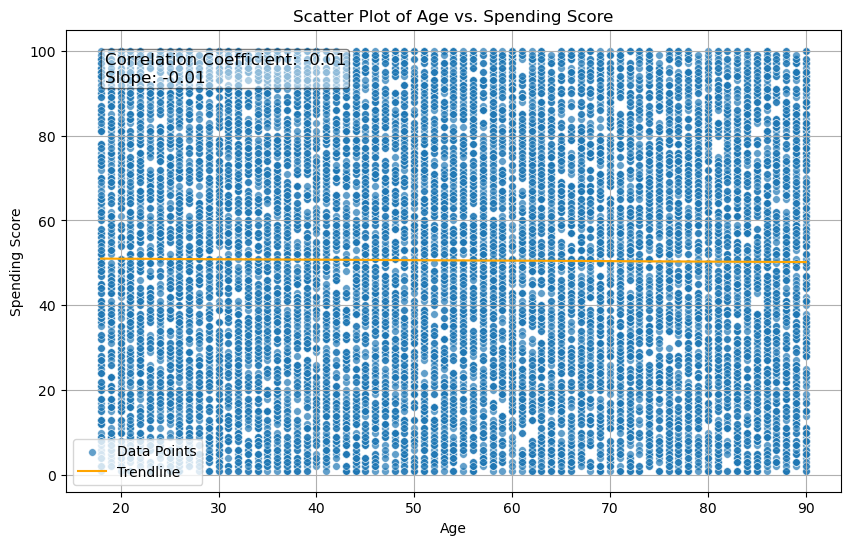

In [263]:
## PART 4 Data Visualization Based on Regression Analysis using Scatterplot and Trendline
## Scatterplot between Age and spending score
## Call related packages to make sure codes will work
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Prepare data for the regression model using 'Age' directly
x = sm.add_constant(data['Age'])
y = data['Spending Score']

# Fit the regression model
model = sm.OLS(y, x).fit()

# Extract slope and correlation coefficient
slope = model.params[1]
r_squared = model.rsquared
correlation_coefficient = (r_squared ** 0.5) if slope >= 0 else -(r_squared ** 0.5)

# Plot scatterplot with smaller points and a trendline
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['Age'], 
    y=data['Spending Score'], 
    label='Data Points', 
    s=30,  
    alpha=0.7 
)

# Generate trendline points using the fitted model
trendline = model.predict(x)
sns.lineplot(x=data['Age'], y=trendline, color='orange', label='Trendline')

# Add notation for slope and correlation coefficient
plt.text(
    0.05,
    0.95,
    f"Correlation Coefficient: {correlation_coefficient:.2f}\nSlope: {slope:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.5)
)

plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Scatter Plot of Age vs. Spending Score')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/4q/fyp8q_t545vf1gx757v54twc0000gn/T/ipykernel_16188/1313760631.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


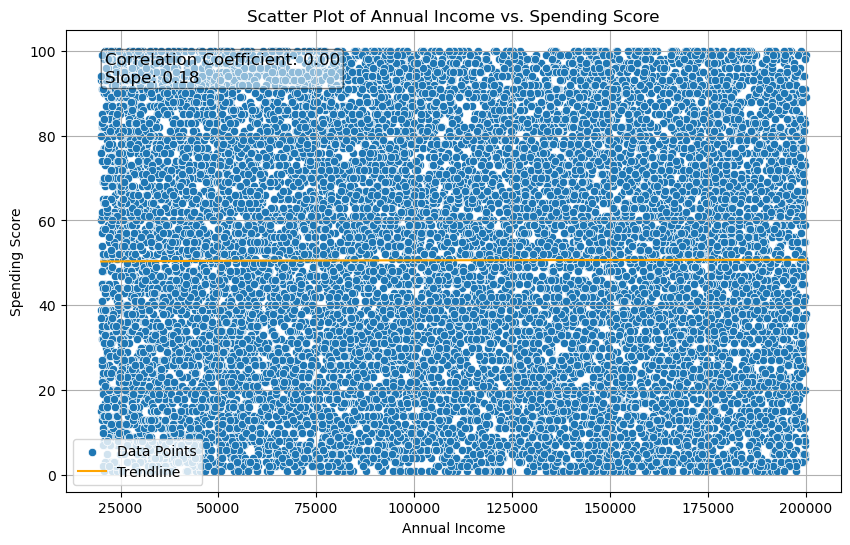

In [264]:
## Scatterplot between annual income and spending score
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Replace zero values in 'Annual Income' with NaN and remove such rows
data['Annual Income'] = data['Annual Income'].replace(0, float('nan'))
data.dropna(subset=['Annual Income'], inplace=True)

# Log-transform 'Annual Income'
log_income = np.log(data['Annual Income'])

# Prepare data for the regression model
x = sm.add_constant(log_income)
y = data['Spending Score']

# Fit the regression model
model = sm.OLS(y, x).fit()

# Extract slope and correlation coefficient
slope = model.params[1]
r_squared = model.rsquared
correlation_coefficient = (r_squared ** 0.5) if slope >= 0 else -(r_squared ** 0.5)

# Scatter plot with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual Income'], y=data['Spending Score'], label='Data Points')

# Generate trendline points using the fitted model
trendline = model.predict(x)
sns.lineplot(x=data['Annual Income'], y=trendline, color='orange', label='Trendline')

# Add notation for slope and correlation coefficient
plt.text(
    0.05,
    0.95,
    f"Correlation Coefficient: {correlation_coefficient:.2f}\nSlope: {slope:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.5)
)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Scatter Plot of Annual Income vs. Spending Score')
plt.legend()
plt.grid(True)
plt.show()


In [265]:
###PART V: Export data to database using SQLite

In [266]:
import sqlite3

database_path = 'cleaned_shoppingdata.sqlite'

# Connect to an SQLite database 
conn = sqlite3.connect(database_path)

df.to_sql('cleaned_data', conn, if_exists='replace', index=False)

# Close the connection
conn.close()
print(f"Data exported to SQLite database at: {database_path}")

# Set Current Working Directory
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

# Reconnect to the SQLite database to query data
conn = sqlite3.connect(database_path)

# Query the data retrieved from the database using read_sql_query
df_from_db = pd.read_sql_query('SELECT * FROM cleaned_data', conn)

# Close the connection
conn.close()

# Show the data output after the retrieval to test functionality of the codes above
print("Data extracted from shopping mall SQLite database:")
print(df_from_db.head())



Data exported to SQLite database at: cleaned_shoppingdata.sqlite
Current working directory: /Users/yfzwork
Data extracted from shopping mall SQLite database:
  Age Group  Gender  Mean Spending Score
0  Under 18  Female            53.222222
1  Under 18    Male            47.394231
2     18-30  Female            49.735390
3     18-30    Male            52.359771
4     30-45  Female            50.161589


In [ ]:
## This completes the Part V

In [ ]:
## Thank you for Reading the codes

In [ ]:
## Group13: Yifan Zang, Reny Marinez, Tapan Uchil, Shubh Goyal, Harshdeep Singh